<B>Data Visualization Task for SID</B>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import random
from matplotlib.ticker import MaxNLocator
import PIL
import sys
import seaborn as sns
import sklearn.metrics
import pickle
import glob
from PIL import Image

In [3]:

gt_dict = {}
gt_images = glob.glob('D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\*.png')
#print(gt_images)
for ig in gt_images:
    gt_id = ig.split('\\')[-1]
    gt_id1 = gt_id.split('_')[0]
    if gt_id1 not in gt_dict:
        gt_dict[gt_id1] = []
    gt_dict[gt_id1].append(ig)
    
# gt_dict = list(set(gt_list))
print("The total number of images in ground truth: {}".format(len(gt_dict)))
print("Ground truth image indices are:")
print(gt_dict)
# img = Image.open('../SID/Ground_truth/00001_0_10s.png')
# imgplot = plt.imshow(img)

The total number of images in ground truth: 231
Ground truth image indices are:


{'00001': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_0_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_10_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_11_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_1_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_2_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_3_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_4_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_5_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_6_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long_down\\00001_7_10s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\long

In [4]:
train_dict_04 = {}
train_dict_10 = {}

train_images = glob.glob('D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\*.png')

for train_file in train_images:
    train_filename = train_file.split('\\')[-1]
    train_id1 = train_filename.split('_')[0]
    train_time = train_filename.split('_')[2][:-5]
    if train_time == '0.04':
        if train_id1 not in train_dict_04:
            train_dict_04[train_id1] = []
        train_dict_04[train_id1].append(train_file)
    else:
        if train_id1 not in train_dict_10:
            train_dict_10[train_id1] = []
        train_dict_10[train_id1].append(train_file)
        
print("The total number of train images is: {}".format(len(train_images)))
print("Train image indices are:")
print(train_dict_04)
print(train_dict_10)

# print(gt_list)
# img = Image.open('../SID/Ground_truth/00001_0_10s.png')
# imgplot = plt.imshow(img)

The total number of train images is: 2697
Train image indices are:


{'00001': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_00_0.04s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_01_0.04s.png'], '00002': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00002_00_0.04s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00002_01_0.04s.png'], '00004': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00004_00_0.04s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00004_01_0.04s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00004_02_0.04s.png'], '00009': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00009_00_0.04s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00009_01_0.04s.png'], '00010': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00010_

{'00001': ['D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_00_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_01_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_02_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_03_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_04_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_05_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_06_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_07_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_08_0.1s.png', 'D:\\joHLCV\\Learning-to-See-in-the-Dark\\dataset_local\\Sony\\short_down\\00001_09_0.1s.png'], '00002': ['D:\\joHLCV\\Learning-to-See

Visualizing Image data

Display the ground truth and the corresponding short exposure images

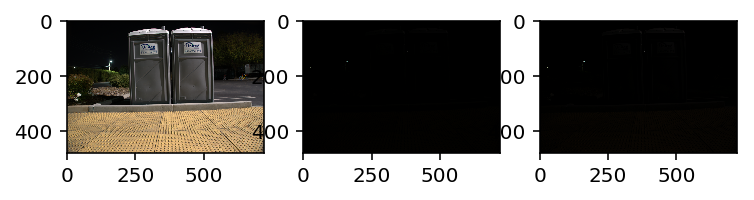

In [5]:
# Consider the first image in Ground truth
fig, ax = plt.subplots(1,3)
gt_img = Image.open(gt_dict['00001'][0])

train_img1 =Image.open( train_dict_04['00001'][0])

train_img2 =Image.open( train_dict_10['00001'][0])

# display images
ax[0].imshow(gt_img);
ax[1].imshow(train_img1);
ax[2].imshow(train_img2);

Multiple Low exposure images correspond to one long exposure image. Let us examine one such set of Ground truth image followed by all of the corresponding low exposure images

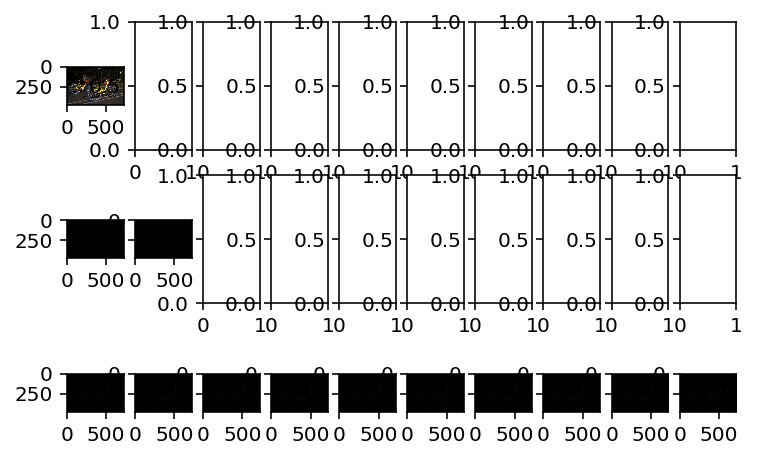

In [6]:
# Consider the second image in Ground truth

# fix,ax = plt.subplots(1,3)

fig, ax = plt.subplots(3,len(train_dict_10['00002']))


gt_img = Image.open(gt_dict['00002'][0])
ax[0][0].imshow(gt_img)

count = 0
for idx in train_dict_04:
    if idx == '00002':
        for i in range(len(train_dict_04[idx])):
            img =Image.open( train_dict_04[idx][i])
            ax[1][count].imshow(img)
            count+=1
count = 0
for idx in train_dict_10:
    if idx == '00002':
        for i in range(len(train_dict_10[idx])):
            img =Image.open( train_dict_10[idx][i])
            ax[2][count].imshow(img)
            count+=1         

# # display images
# ax[0].imshow(gt_img);
# ax[1].imshow(train_img1);
# ax[2].imshow(train_img2);

Examine the R, G and B channels 

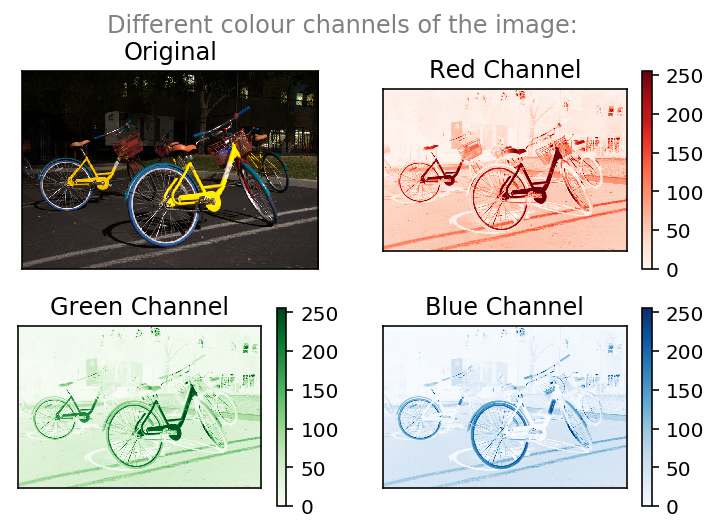

In [7]:
img1 = Image.open(gt_dict['00002'][0])
img = cv2.imread(gt_dict['00002'][0])
b, g, r = cv2.split(img)

ttl = img.size / 3 #divide by 3 to get the number of image PIXELS

"""b, g, and r are actually numpy.ndarray types,
so you need to use the appropriate method to sum
all array elements"""
B = float(np.sum(b)) / ttl #convert to float, as B, G, and R will otherwise be int
G = float(np.sum(g)) / ttl
R = float(np.sum(r)) / ttl
B_mean1 = list()
G_mean1 = list()
R_mean1 = list()
B_mean1.append(B)
G_mean1.append(G)
R_mean1.append(R)

#display
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(img1)
axs[0,0].set_title('Original')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

cax_01 = axs[0,1].imshow(r, cmap='Reds')
axs[0,1].set_title('Red Channel')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
fig.colorbar(cax_01, ax=axs[0,1])

cax_10 = axs[1,0].imshow(g, cmap='Greens')
axs[1,0].set_title('Green Channel')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
fig.colorbar(cax_10, ax=axs[1,0])

cax_11 = axs[1,1].imshow(b, cmap='Blues')
axs[1,1].set_title('Blue Channel')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
fig.colorbar(cax_11, ax=axs[1,1])

plt.suptitle('Different colour channels of the image:', color ='gray')
plt.show()

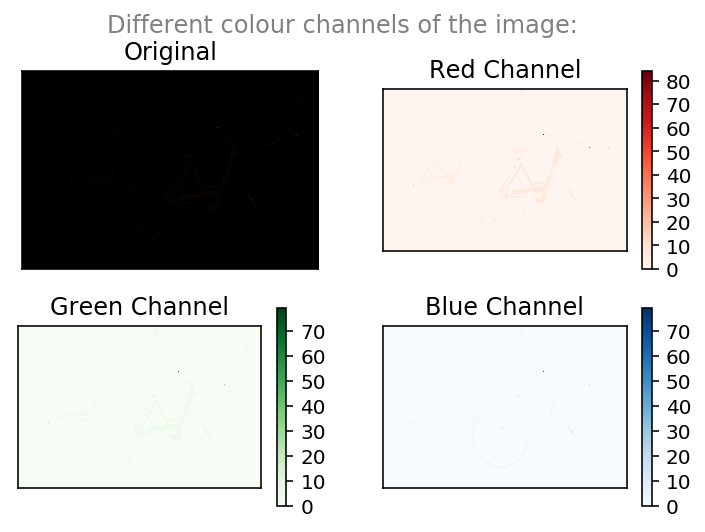

In [8]:
img1 =Image.open(train_dict_04['00002'][0])
img = cv2.imread(train_dict_04['00002'][0])
b, g, r = cv2.split(img)

ttl = img.size / 3 #divide by 3 to get the number of image PIXELS

"""b, g, and r are actually numpy.ndarray types,
so you need to use the appropriate method to sum
all array elements"""
# B = float(np.sum(b)) / ttl #convert to float, as B, G, and R will otherwise be int
# G = float(np.sum(g)) / ttl
# R = float(np.sum(r)) / ttl
# B_mean1 = list()
# G_mean1 = list()
# R_mean1 = list()
# B_mean1.append(B)
# G_mean1.append(G)
# R_mean1.append(R)

#display
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(img1)
axs[0,0].set_title('Original')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

cax_01 = axs[0,1].imshow(r, cmap='Reds')
axs[0,1].set_title('Red Channel')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
fig.colorbar(cax_01, ax=axs[0,1])

cax_10 = axs[1,0].imshow(g, cmap='Greens')
axs[1,0].set_title('Green Channel')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
fig.colorbar(cax_10, ax=axs[1,0])

cax_11 = axs[1,1].imshow(b, cmap='Blues')
axs[1,1].set_title('Blue Channel')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
fig.colorbar(cax_11, ax=axs[1,1])

plt.suptitle('Different colour channels of the image:', color ='gray')
plt.show()

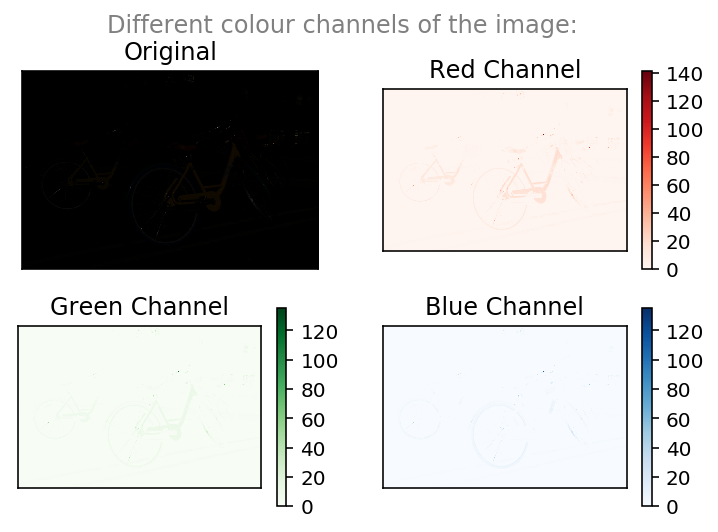

In [9]:
img1 =Image.open(train_dict_10['00002'][0])
img = cv2.imread(train_dict_10['00002'][0])
b, g, r = cv2.split(img)

ttl = img.size / 3 #divide by 3 to get the number of image PIXELS

"""b, g, and r are actually numpy.ndarray types,
so you need to use the appropriate method to sum
all array elements"""
# B = float(np.sum(b)) / ttl #convert to float, as B, G, and R will otherwise be int
# G = float(np.sum(g)) / ttl
# R = float(np.sum(r)) / ttl
# B_mean1 = list()
# G_mean1 = list()
# R_mean1 = list()
# B_mean1.append(B)
# G_mean1.append(G)
# R_mean1.append(R)

#display
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(img1)
axs[0,0].set_title('Original')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

cax_01 = axs[0,1].imshow(r, cmap='Reds')
axs[0,1].set_title('Red Channel')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
fig.colorbar(cax_01, ax=axs[0,1])

cax_10 = axs[1,0].imshow(g, cmap='Greens')
axs[1,0].set_title('Green Channel')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
fig.colorbar(cax_10, ax=axs[1,0])

cax_11 = axs[1,1].imshow(b, cmap='Blues')
axs[1,1].set_title('Blue Channel')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
fig.colorbar(cax_11, ax=axs[1,1])

plt.suptitle('Different colour channels of the image:', color ='gray')
plt.show()

<B>Manipulating the exposure of an image</B>


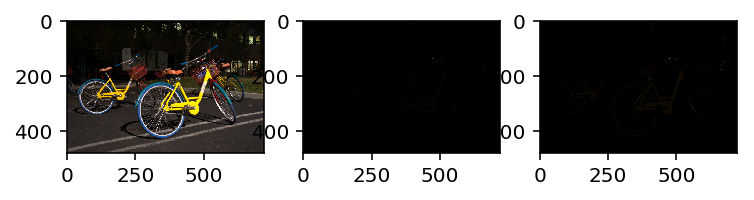

In [10]:
# Consider the first image in Ground truth
fig, ax = plt.subplots(1,3)
gt_img = Image.open(gt_dict['00001'][0])

train_img1 =Image.open( train_dict_04['00002'][0])

train_img2 =Image.open( train_dict_10['00002'][0])

# display images
ax[0].imshow(gt_img);
ax[1].imshow(train_img1);
ax[2].imshow(train_img2); 

In [13]:
import skimage.exposure as skie
img = plt.imread(gt_dict['00001'][0])
def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])

    plt.show()



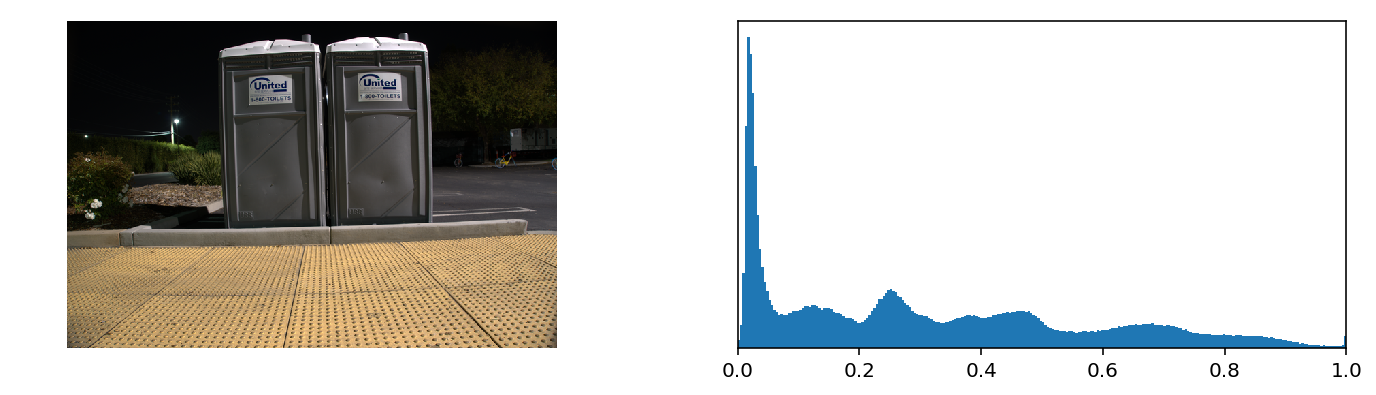

In [14]:
show(img)

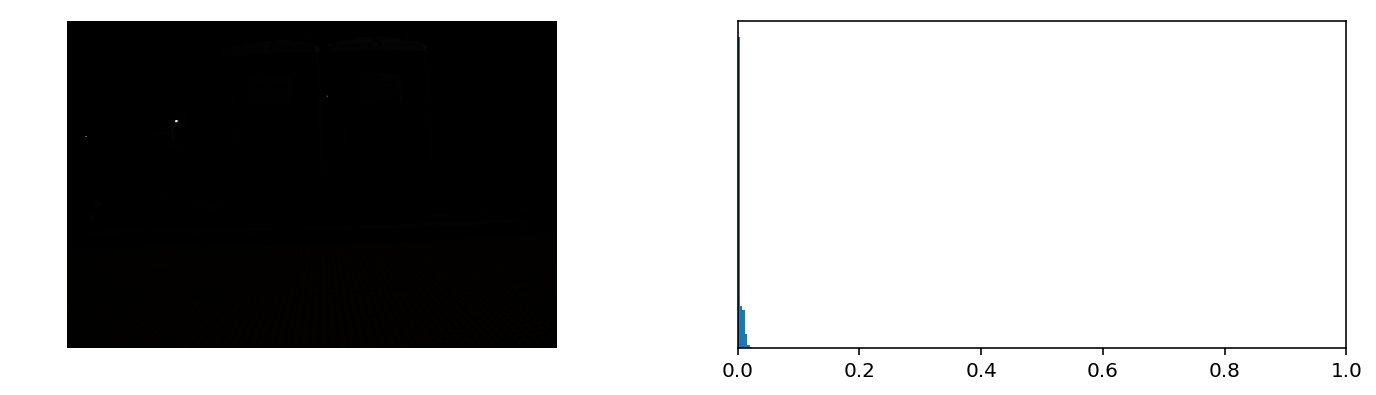

In [15]:
img = plt.imread(train_dict_04['00001'][0])
show(img)

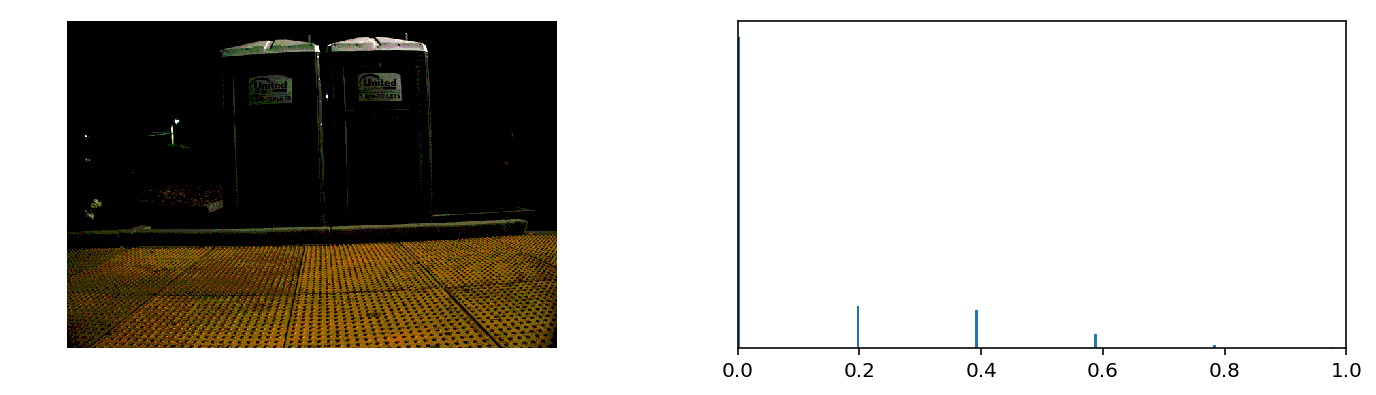

In [20]:
show(skie.rescale_intensity(
    img, in_range=(0, .02), out_range=(0, 1)))

The result obtained on manually manipulating the image exposure like in photo editing tools is not a match to its corresponding ground truth image. Hence, our project aims at using a Convolutional Neural Network to examine the various approaches that may yield better results.

c:\users\jyothsna\anaconda3\envs\pytorch\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
c:\users\jyothsna\anaconda3\envs\pytorch\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to float32
  .format(dtypeobj_in, dtypeobj_out))


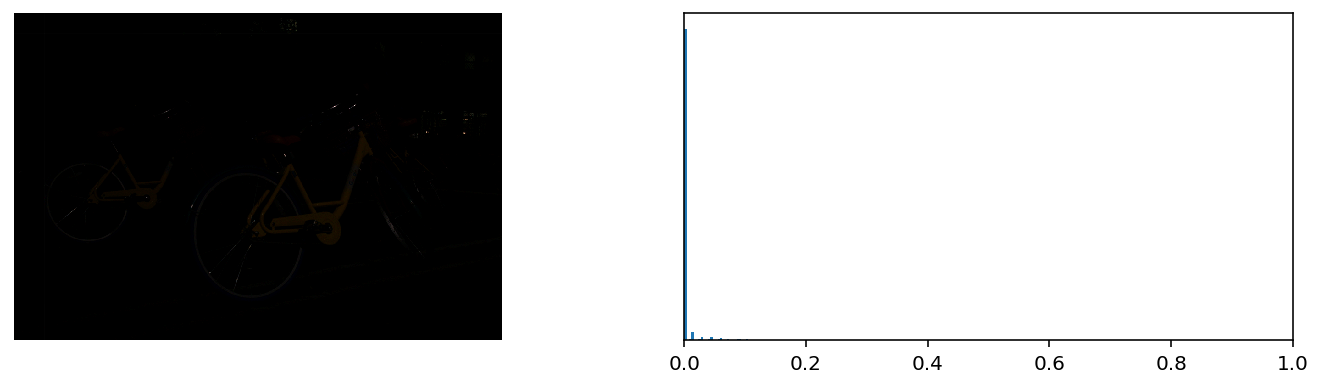

In [20]:
show(skie.equalize_adapthist(img))